In [1]:
#importing libraries such as pandas, numpy and matploylib, seaborn for the visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading our cleaned_releases_allmedia csv file to use
df = pd.read_csv('cleaned_releases_allmedia.csv')

In [3]:
#printing the columns of our dataset
df.columns

Index(['Reporting_Year', 'NPRI_ID', 'Company_Name', 'NAICS', 'NAICS Title',
       'PROVINCE', 'Latitude', 'Longitude', 'CAS_Number',
       'Substance Name (English)', 'Estimation_Method',
       'Sum of release to all media (<1tonne)'],
      dtype='object')

In [4]:
#checking if there is still any missing values but we already cleaned in our old file
df.isnull().sum()

,0
Reporting_Year,0
NPRI_ID,0
Company_Name,0
NAICS,0
NAICS Title,0
PROVINCE,0
Latitude,0
Longitude,0
CAS_Number,0
Substance Name (English),0


In [5]:
# Selecting only numerical columns (float64 and int64 types) from the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculating the first quartile (Q1) - 25th percentile for each numerical column
Q1 = df[numerical_columns].quantile(0.25)

# Calculating the third quartile (Q3) - 75th percentile for each numerical column
Q3 = df[numerical_columns].quantile(0.75)

# Computing the Interquartile Range (IQR), which is the range between Q3 and Q1
IQR = Q3 - Q1

# Defining the lower bound for detecting outliers (1.5 * IQR below Q1)
lower_bound = Q1 - 1.5 * IQR

# Defining the upper bound for detecting outliers (1.5 * IQR above Q3)
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers by checking if values are outside the lower or upper bounds
outliers = (df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)

# Counting the number of outliers per column
outliers_count = outliers.sum()

# Printing the number of outliers detected in each numerical column
print("Number of outliers per column:")
print(outliers_count)



Number of outliers per column:
Reporting_Year                               0
NPRI_ID                                   4792
NAICS                                    16393
Latitude                                   288
Longitude                                   57
Sum of release to all media (<1tonne)     4807
dtype: int64


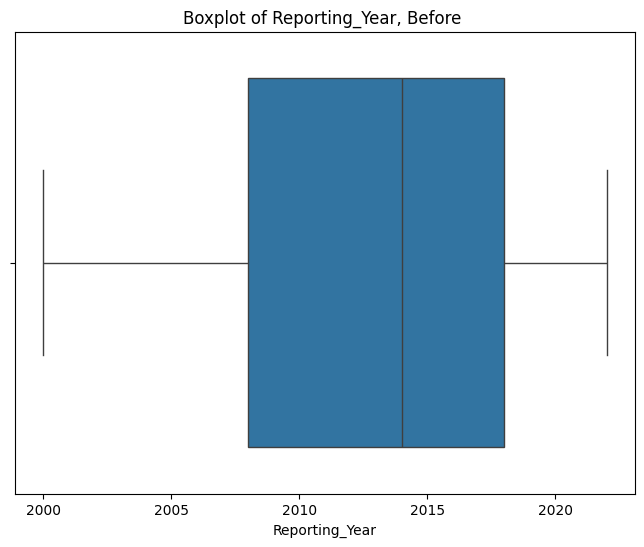

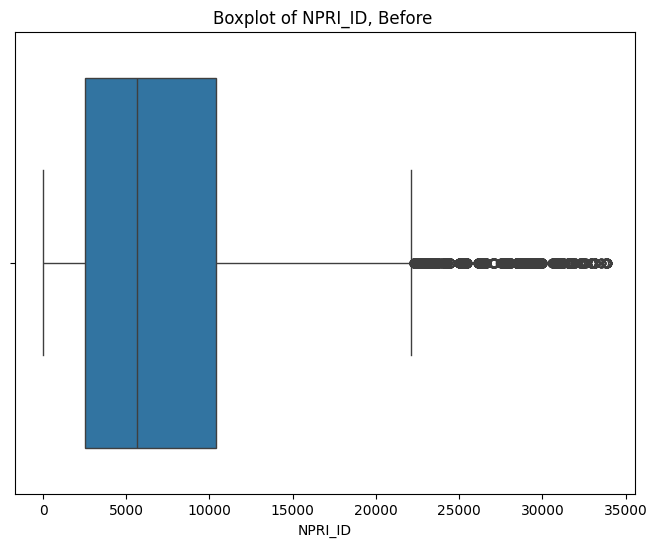

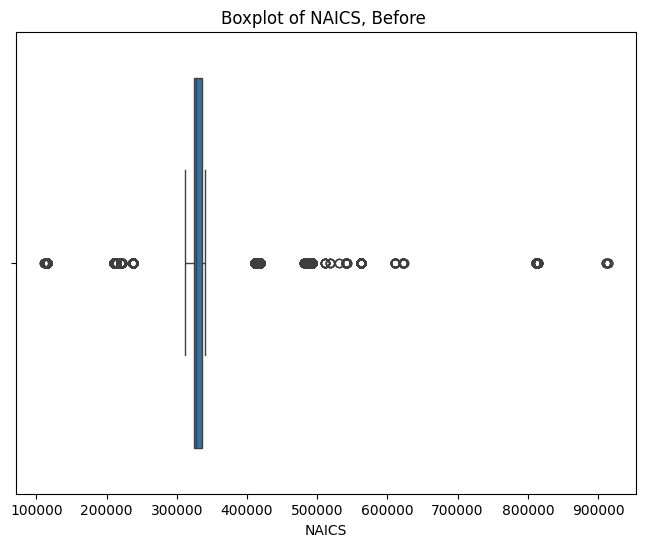

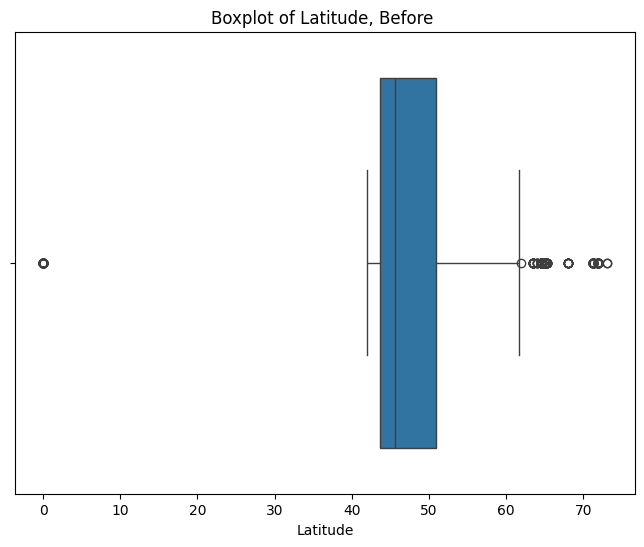

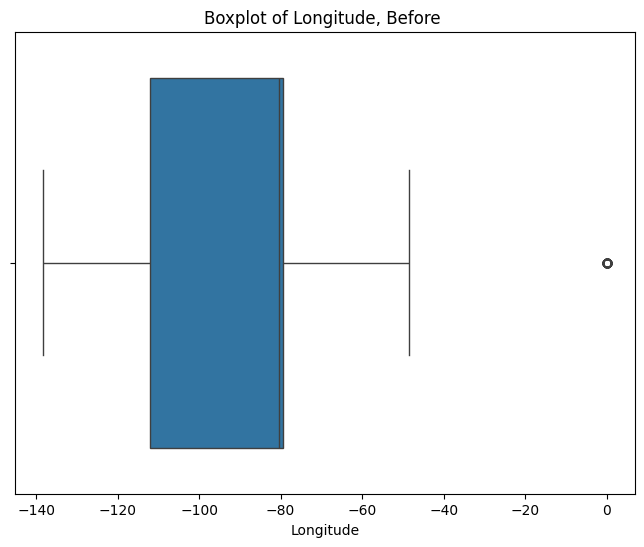

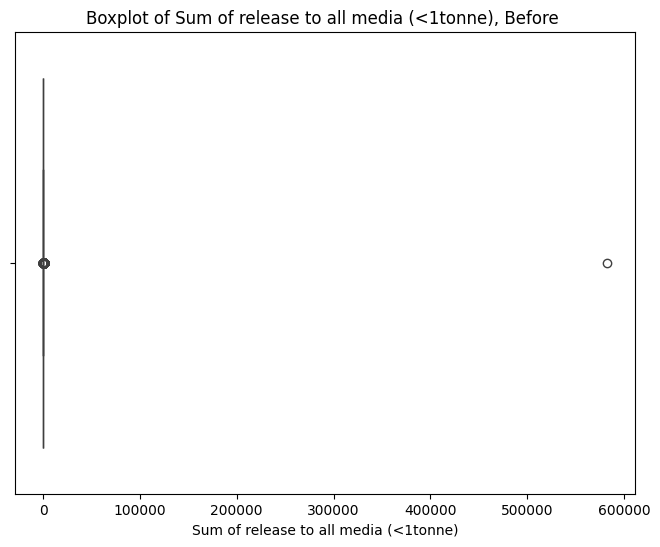

In [6]:
# Generating a boxplot for the current column to visualize its distribution and outliers
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}, Before ')
    plt.show()

In [7]:
# Capping outliers at the upper and lower bounds
for col in numerical_columns:
    # If a value is greater than the upper bound, replace it with the upper bound.
    # If a value is less than the lower bound, replace it with the lower bound.
    # Otherwise, keep the original value.
    df[col] = np.where(df[col] > upper_bound[col], upper_bound[col],
                       np.where(df[col] < lower_bound[col], lower_bound[col], df[col]))

    print("Outliers have been capped.")


Outliers have been capped.
Outliers have been capped.
Outliers have been capped.
Outliers have been capped.
Outliers have been capped.
Outliers have been capped.


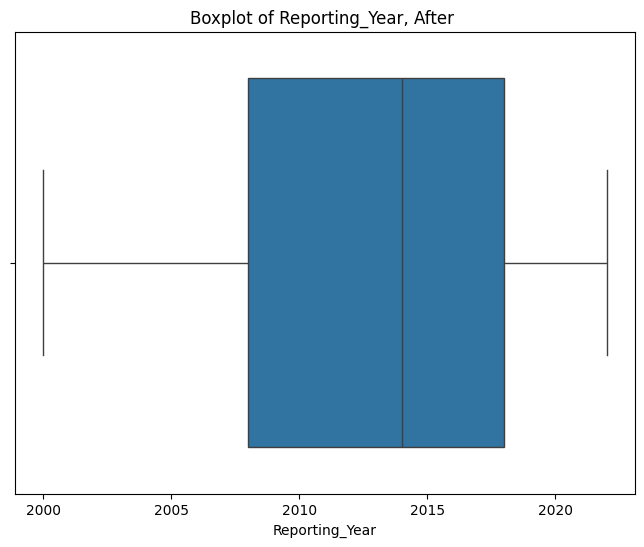

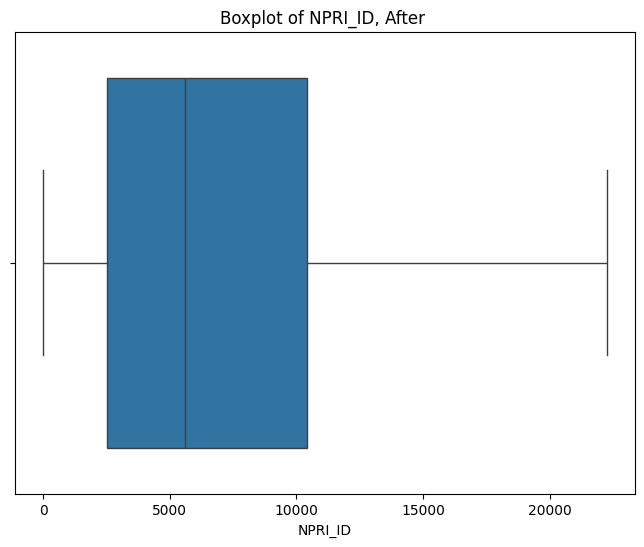

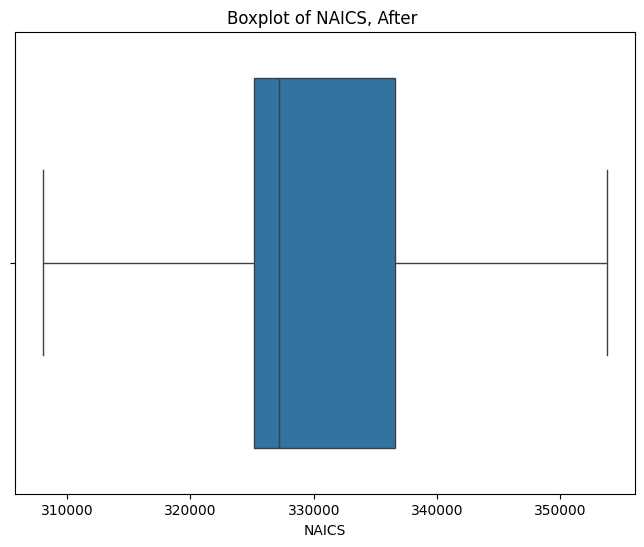

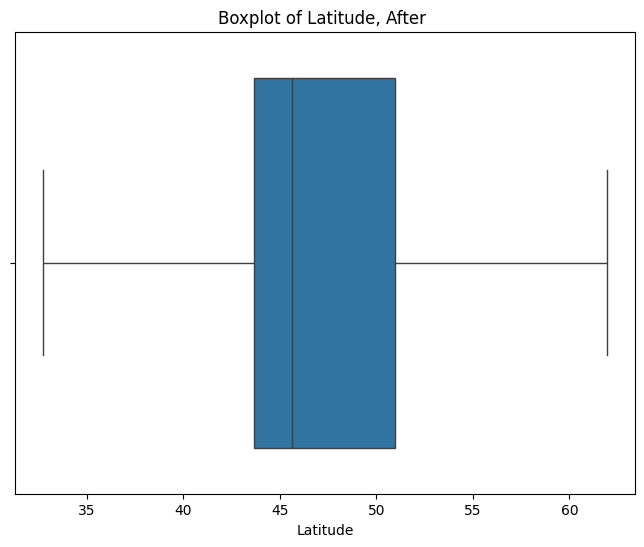

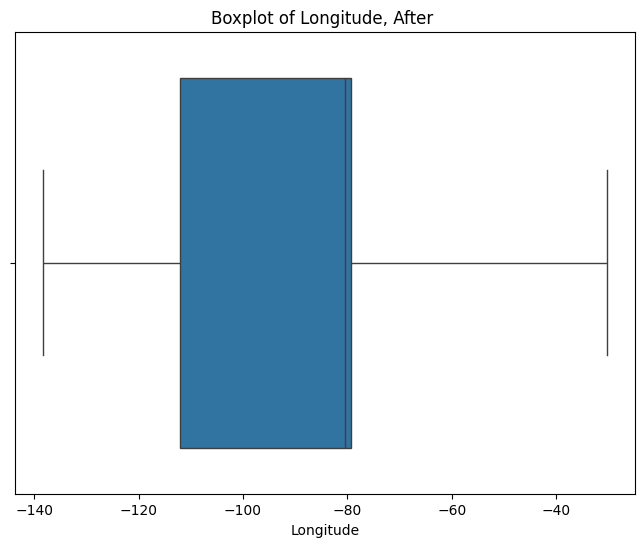

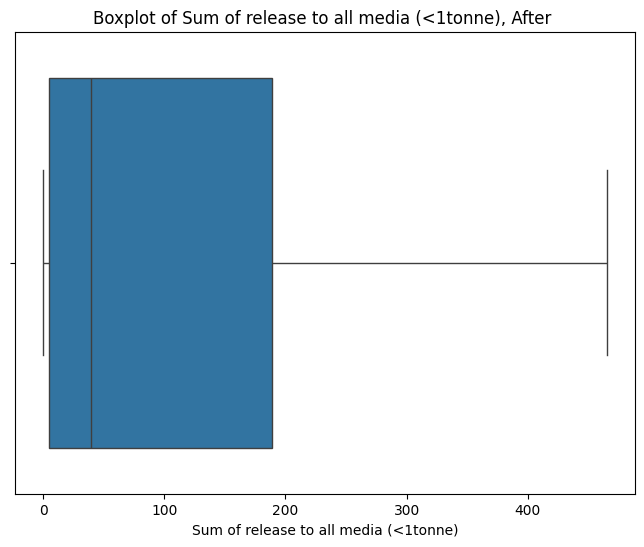

In [8]:
# Generating a boxplot for the current column to visualize its distribution after removing outliers

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}, After ')
    plt.show()

In [9]:
#saving csv file after removing outliers
df.to_csv("After Removing Outliers allmedia.csv", index=False)

This bar chart represents the sum of pollutant releases across all media types (air, water, land) for the top 10 provinces in Canada. Key observations:

Ontario (ON) has the highest total pollutant releases, exceeding 2 million units.
Alberta (AB) follows, with over 1 million units.
Quebec (QC), British Columbia (BC), and Saskatchewan (SK) have moderate release levels.
The remaining provinces (MB, NS, NB, NL, NT) contribute significantly less.
Helps identify provinces with the highest industrial pollution, useful for classification modeling.
Highlights potential regional pollution trends for predicting reductions in future emissions.
Supports regression analysis by showing overall emission levels that can be used for trend forecasting.
Ontario and Alberta should be key focus areas for deeper analysis since they contribute the most pollution.

<ipython-input-9-46d301f73314>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_provinces.index, y=top_provinces.values, palette="viridis")


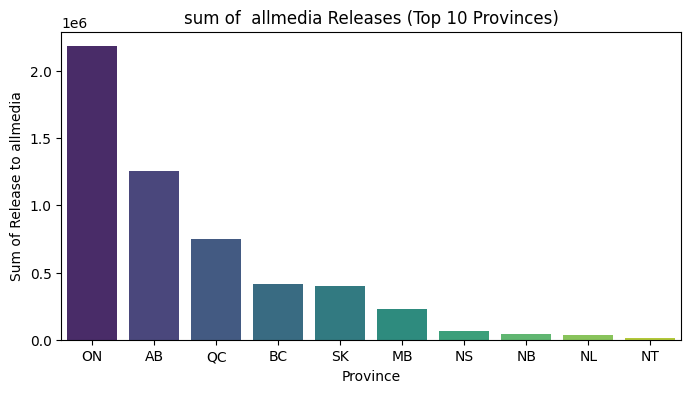

In [ ]:
# Get the top 10 provinces by total Land release
top_provinces = df.groupby("PROVINCE")["Sum of release to all media (<1tonne)"].sum().nlargest(10)

# Bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x=top_provinces.index, y=top_provinces.values, palette="viridis")

# Labels and title
plt.title("sum of  allmedia Releases (Top 10 Provinces)")
plt.xlabel("Province")
plt.ylabel("Sum of Release to allmedia")

plt.show()


This bar chart represents the total sum of releases to all media types (air, water, land) across different years from 2000 to 2022. Key observations:

2000–2010: Relatively stable pollution levels, fluctuating around 150,000–180,000 units.
2011–2017: Sharp increase, peaking around 350,000 units in 2013–2015. This suggests an increase in industrial activity or a change in reporting standards.
2018–2022: Noticeable decline, indicating either improved regulations, cleaner industrial processes, or economic shifts affecting emissions.
Supports forecasting emissions for the next 5 years.
Confirms a downward trend, aligning with your goal of predicting the largest decrease by province.
Useful for training regression models based on past patterns.

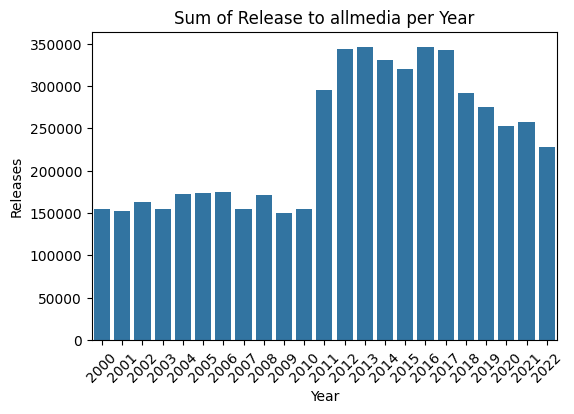

In [ ]:
df_grouped = df.groupby('Reporting_Year')['Sum of release to all media (<1tonne)'].sum().reset_index()
df_grouped['Reporting_Year'] = df_grouped['Reporting_Year'].astype(int)  # Convert to integer

plt.figure(figsize=(6,4))
sns.barplot(x='Reporting_Year', y='Sum of release to all media (<1tonne)', data=df_grouped)
plt.title('Sum of Release to allmedia per Year')
plt.xlabel('Year')
plt.ylabel('Releases')
plt.xticks(rotation=45)
plt.show()


Shows total emissions by province over time (2000–2022).
Red = High emissions, Blue = Low emissions.
Ontario (ON) and Alberta (AB) had high emissions from 2010–2015, then a decline.
Saskatchewan (SK) and Quebec (QC) show moderate emissions with a slight downward trend.
Other provinces have consistently low emissions.
Helps identify which province is seeing the largest decline in emissions.
Confirms that Ontario and Alberta had peak emissions but have been decreasing.
Useful for regression modeling to predict future trends for the next 5 years.



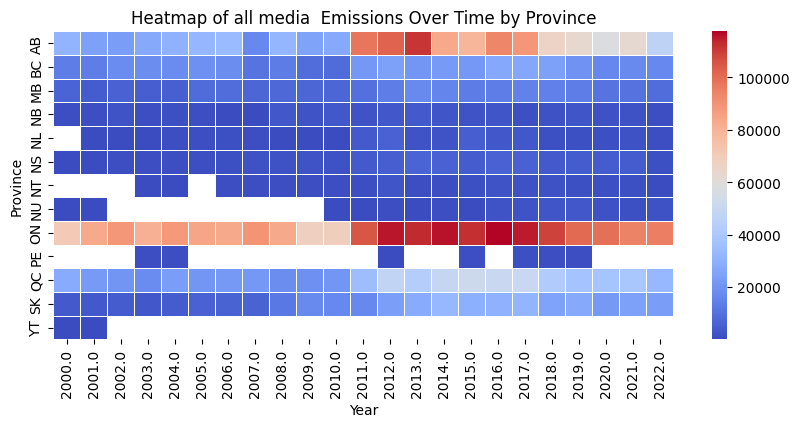

In [ ]:
pivot_df = df.pivot_table(values="Sum of release to all media (<1tonne)", index="PROVINCE", columns="Reporting_Year", aggfunc="sum")

plt.figure(figsize=(10, 4))
sns.heatmap(pivot_df, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Heatmap of all media  Emissions Over Time by Province")
plt.xlabel("Year")
plt.ylabel("Province")
plt.show()



This line chart tracks the sum of emissions to all media (air, water, land) in tonnes over time for the five lowest-emission provinces:
NL (Newfoundland and Labrador, blue): Large spikes around 2010-2015, then a decreasing trend.
NT (Northwest Territories, orange): Smaller peaks, with a decline after 2015.
NU (Nunavut, green): Initially low emissions, but showing an increasing trend since 2015.
PE (Prince Edward Island, red): Minor fluctuations, overall lower emissions.
YT (Yukon, purple): Mostly stable, very low emissions over time.

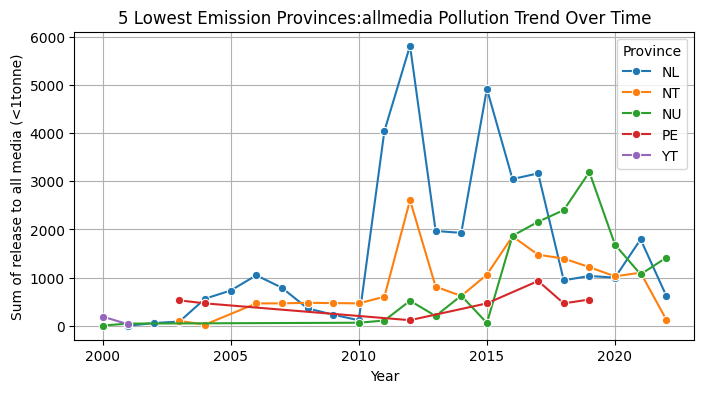

In [ ]:
province_trend = df.groupby(["PROVINCE", "Reporting_Year"])["Sum of release to all media (<1tonne)"].sum().reset_index()

# Get Bottom 5 provinces with lowest  emissions
bottom_5_provinces = province_trend.groupby("PROVINCE")["Sum of release to all media (<1tonne)"].sum().nsmallest(5).index

# Filter data for only the top 5 provinces
df_bottom_5 = province_trend[province_trend["PROVINCE"].isin(bottom_5_provinces)]

# Plot the trend
plt.figure(figsize=(8, 4))
sns.lineplot(data=df_bottom_5, x="Reporting_Year", y="Sum of release to all media (<1tonne)", hue="PROVINCE", marker="o")

# Formatting
plt.title("5 Lowest Emission Provinces:allmedia Pollution Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Sum of release to all media (<1tonne)")
plt.legend(title="Province")
plt.grid(True)
plt.show()


These bar charts show the top companies by total pollution releases to all media (air, water, and land).

Imperial Oil has the highest emissions, exceeding 200,000 units, making it the biggest polluter.
Tervita Corp., Doepker Industries Ltd., Shell Canada Products, and PETRO-CANADA follow, each releasing 90,000–100,000 units.
Mid-level contributors (Pembina Pipeline, Keyera Corp) have 50,000–75,000 units.
Lower contributors (Brenntag Canada, Clean Harbors Canada, Sherwin-Williams) release below 50,000 units.

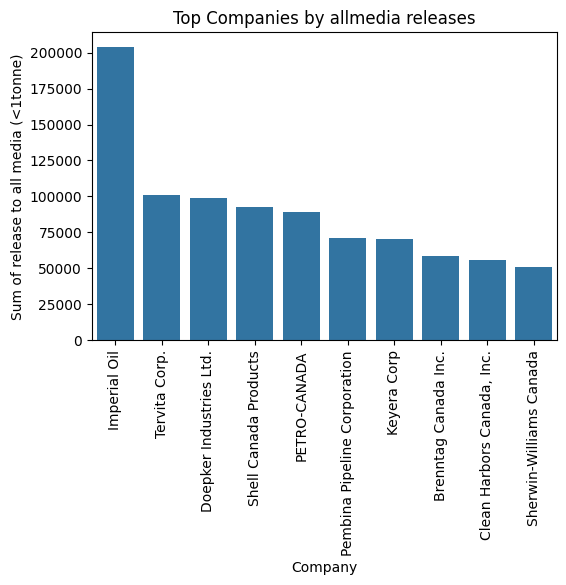

In [ ]:
top_companies = df.groupby('Company_Name')['Sum of release to all media (<1tonne)'].sum().reset_index().sort_values(by='Sum of release to all media (<1tonne)', ascending=False).head(10)

plt.figure(figsize=(6,4))
sns.barplot(x='Company_Name', y='Sum of release to all media (<1tonne)', data=top_companies)
plt.title('Top Companies by allmedia releases')
plt.xlabel('Company')
plt.ylabel('Sum of release to all media (<1tonne)')
plt.xticks(rotation=90)
plt.show()



This heatmap shows correlations between variables in environmental data. Key points:

Negative correlations (blue):

NAICS & NPRI_ID (-0.41) → Industry classification differences.
Latitude & Longitude (-0.61) → Geographic trend.
NAICS & Total Release to Water (-0.12) → Industry impact on pollution.
Positive correlations (red):

NPRI_ID & Reporting_Year (0.18) → More reports over time.
Latitude & Reporting_Year (0.1) → Regional shifts.
Longitude & Water Release (0.047) → Small geographic effect.
It helps identify industrial and geographic trends in pollution.

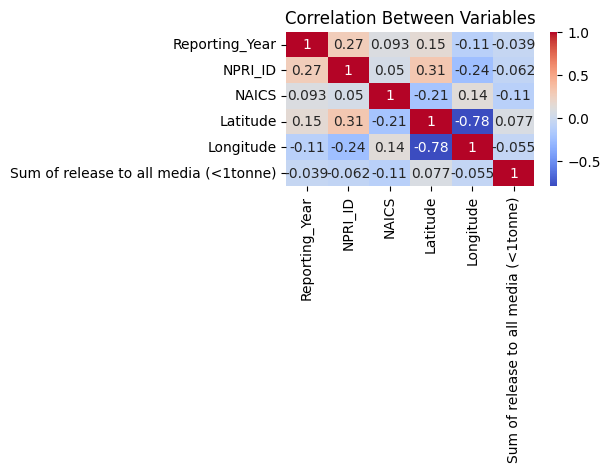

In [ ]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(4,2))
sns.heatmap(numerical_df.corr(), cmap='coolwarm', annot=True)
plt.title("Correlation Between Variables")
plt.show()

The graph shows the relative percentages of the most common pollutants released:

Toluene: 27.2%

Xylene (all isomers): 24.1%

n-Hexane: 19.6%

Methanol: 17.6%

Ammonia (total): 11.4%

This chart highlights which pollutants are most prevalent, helping target reduction efforts.

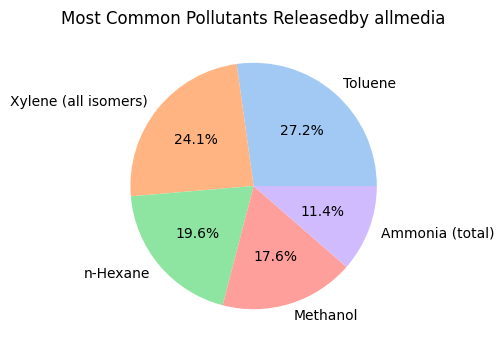

In [ ]:
# Group by pollutant and sum emissions
top_pollutants = df.groupby('Substance Name (English)')['Sum of release to all media (<1tonne)'].sum().reset_index()

# Get the top 5
top_pollutants = top_pollutants.sort_values(by='Sum of release to all media (<1tonne)', ascending=False).head(5)

# Plot
plt.figure(figsize=(4,4))
plt.pie(top_pollutants['Sum of release to all media (<1tonne)'], labels=top_pollutants['Substance Name (English)'], autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Most Common Pollutants Releasedby allmedia")
plt.show()


Ontario (ON) has the highest land releases.

Quebec (QC) follows with slightly lower releases.

British Columbia (BC), Alberta (AB), and the remaining provinces (New Brunswick (NB), Newfoundland and Labrador (NL), Manitoba (MB), Nova Scotia (NS), and Saskatchewan (SK)) have progressively lower releases.

Prince Edward Island (PE) has the lowest release.
This data helps identify which provinces have the highest pollution levels and could benefit most from targeted pollution control measures.

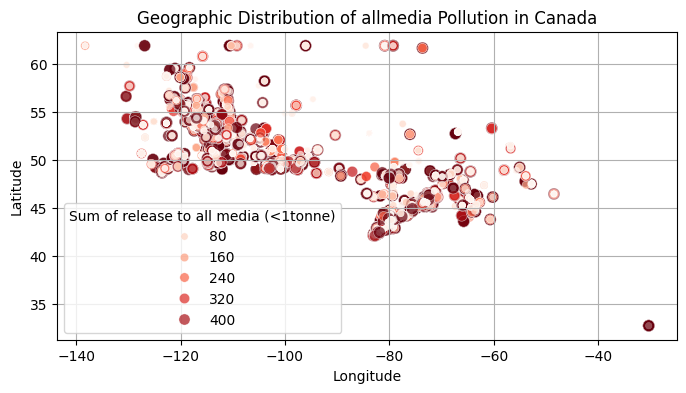

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=df,
    x="Longitude",
    y="Latitude",
    size="Sum of release to all media (<1tonne)",
    hue="Sum of release to all media (<1tonne)",
    palette="Reds",  # Red color for pollution hotspots
    alpha=0.7
)

# Add labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of allmedia Pollution in Canada")
plt.grid(True)

# Show plot
plt.show()

Both graphs illustrate the relationship between estimation methods and Sum of release to all media (<1tonne). The x-axis represents different estimation methods used to measure pollution levels, while the y-axis represents the total reported release. Some estimation methods, such as "NI - No information available ," show significantly higher reported pollution values, while others remain lower and more consistent.
NI - No information available has the highest total releases with significant variability.

M1- Continuous Emission monitoring, E2- published emission factor  and Engineering Estimates (O) have relatively lower releases.

Sp-speciation profile method has the lowest total releases.

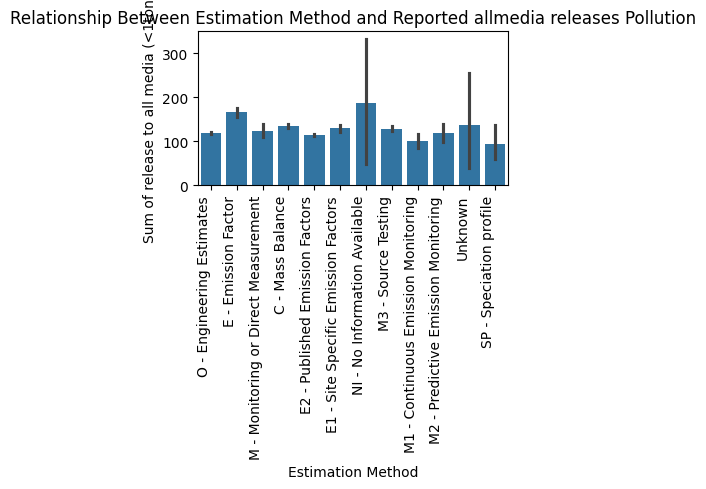

In [ ]:
plt.figure(figsize=(4, 2))

# Create a boxplot
sns.barplot(data=df, x='Estimation_Method', y='Sum of release to all media (<1tonne)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Set titles and labels
plt.title('Relationship Between Estimation Method and Reported allmedia releases Pollution')
plt.xlabel('Estimation Method')
plt.ylabel('Sum of release to all media (<1tonne)')

# Display the plot
plt.show()

The graph displays the top 10 polluting industries by NAICS codes, showing the total substance releases across air, water, and land. The oil and gas extraction industry has the highest emissions, followed by chemical manufacturing, petroleum refineries, and waste treatment. Each bar represents an industry, with stacked colors indicating different subcategories. The legend provides industry names for better understanding.

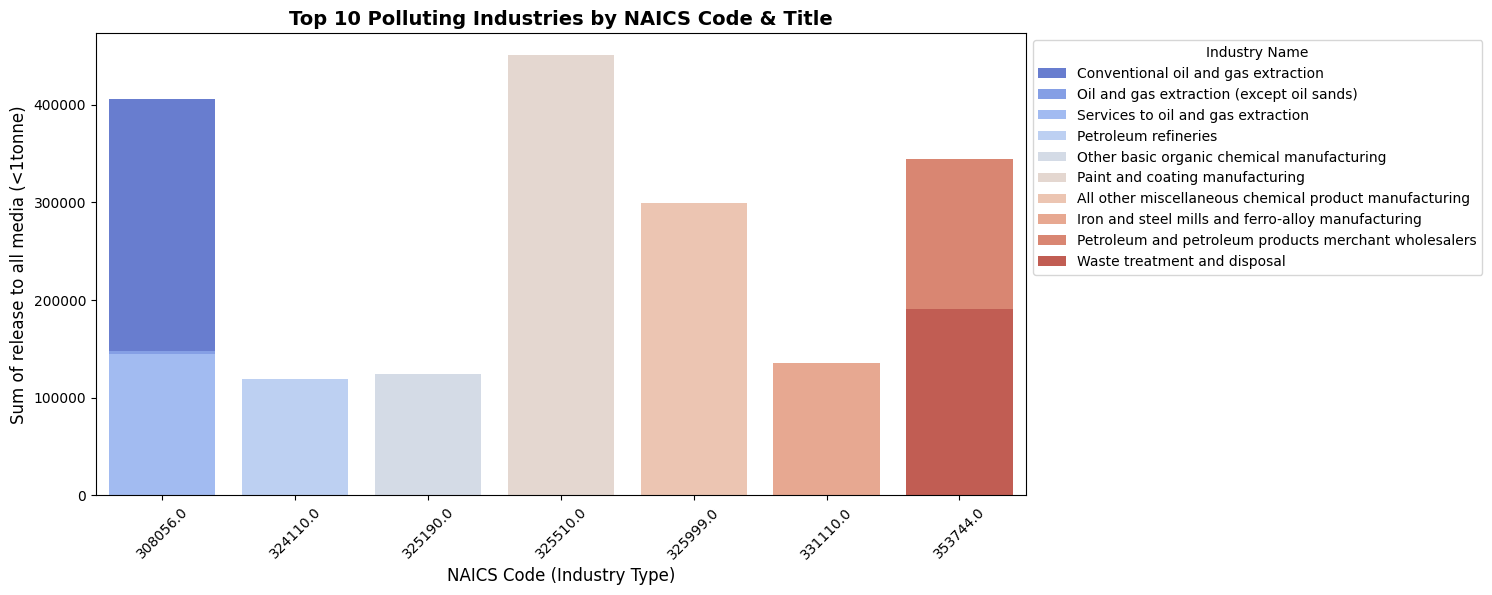

In [ ]:


# Aggregate total pollution by NAICS Code & NAICS Title
industry_pollution = df.groupby(['NAICS', 'NAICS Title'])['Sum of release to all media (<1tonne)'].sum().reset_index()

# Sort industries by total pollution (Top 10)
industry_pollution = industry_pollution.sort_values(by='Sum of release to all media (<1tonne)', ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=industry_pollution, x='NAICS', y='Sum of release to all media (<1tonne)', hue='NAICS Title', dodge=False, palette='coolwarm')

# Labels and title
plt.title("Top 10 Polluting Industries by NAICS Code & Title", fontsize=14, fontweight='bold')
plt.xlabel("NAICS Code (Industry Type)", fontsize=12)
plt.ylabel("Sum of release to all media (<1tonne)", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

plt.legend(title="Industry Name", bbox_to_anchor=(1, 1), loc='upper left')  # Move legend outside

plt.show()



Visuals for substances


Key Points:
Toluene, Xylene (all isomers), and n-Hexane have the highest total emissions.
Other major pollutants include Methanol, Ammonia, Benzene, and Ethylbenzene.
The x-axis represents the total release (in tonnes), while the y-axis lists the substances.
Darker bars indicate higher emissions, while lighter bars show relatively lower amounts.

<ipython-input-22-4c1f3514c938>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_substances.values, y=top_substances.index, palette="viridis")


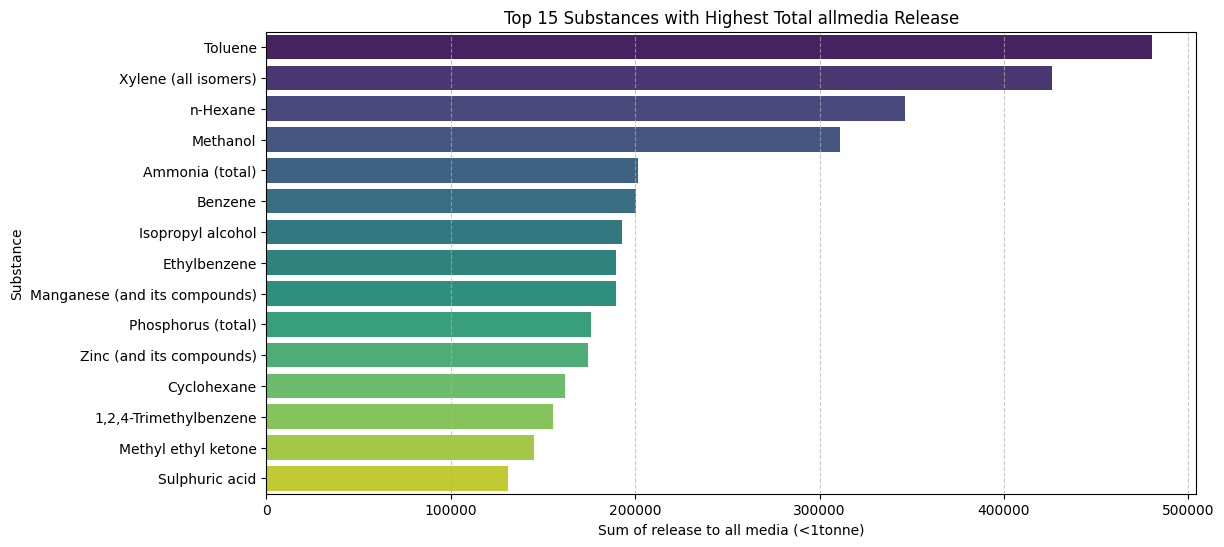

In [ ]:
top_substances = df.groupby("Substance Name (English)")['Sum of release to all media (<1tonne)'].sum().nlargest(15)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_substances.values, y=top_substances.index, palette="viridis")
plt.title("Top 15 Substances with Highest Total allmedia Release")
plt.xlabel("Sum of release to all media (<1tonne)")
plt.ylabel("Substance")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

Key Points:
The x-axis represents the year, while the y-axis shows the sum of releases to all media (air, water, land).
Toluene (green) had a significant increase around 2010, peaking in the mid-2010s before declining.
Xylene, n-Hexane, and Methanol show similar trends, with a noticeable rise after 2010 and fluctuations over time.
Ammonia (blue) has relatively lower values and a more stable trend compared to the others.

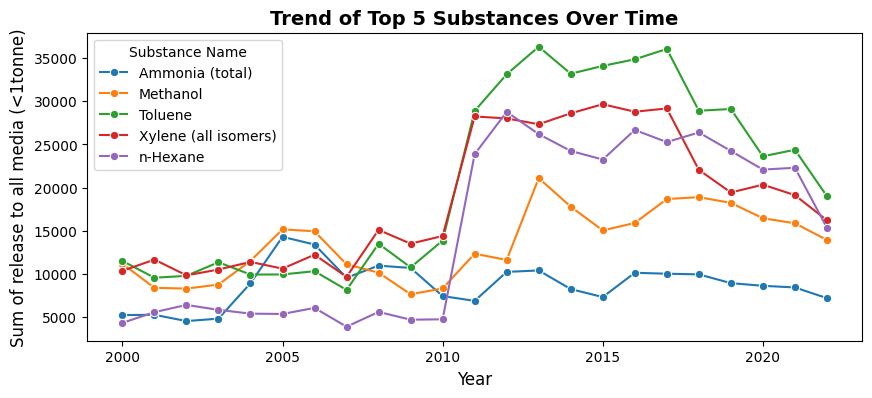

In [ ]:
top_substances = df.groupby('Substance Name (English)')['Sum of release to all media (<1tonne)'].sum().nlargest(5).index
trend_data = df[df['Substance Name (English)'].isin(top_substances)]
trend_data = trend_data.groupby(['Reporting_Year', 'Substance Name (English)'])['Sum of release to all media (<1tonne)'].sum().reset_index()

plt.figure(figsize=(10,4))
sns.lineplot(data=trend_data, x='Reporting_Year', y='Sum of release to all media (<1tonne)', hue='Substance Name (English)', marker='o')
plt.title("Trend of Top 5 Substances Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Sum of release to all media (<1tonne)", fontsize=12)
plt.legend(title="Substance Name")
plt.show()


The graph shows the relative percentages of the most common pollutants released:

Toluene: 27.2%

Xylene (all isomers): 24.1%

n-Hexane: 19.6%

Methanol: 17.6%

Ammonia (total): 11.4%

This chart highlights which pollutants are most prevalent, helping target reduction efforts.

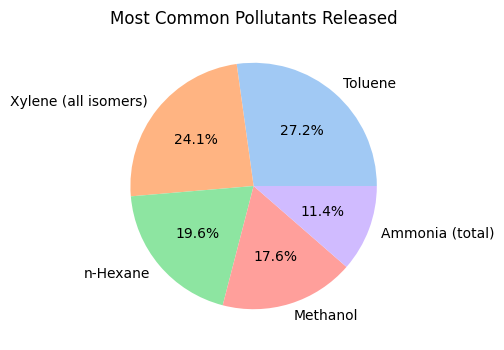

In [ ]:
# Group by pollutant and sum emissions
top_pollutants = df.groupby('Substance Name (English)')['Sum of release to all media (<1tonne)'].sum().reset_index()

# Get the top 5
top_pollutants = top_pollutants.sort_values(by='Sum of release to all media (<1tonne)', ascending=False).head(5)

# Plot
plt.figure(figsize=(4,4))
plt.pie(top_pollutants['Sum of release to all media (<1tonne)'], labels=top_pollutants['Substance Name (English)'], autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Most Common Pollutants Released")
plt.show()
